Name: YEMNI Daoud <br>
Student id: 000437531 <br>
University: ULB

# Problem 1.5 (p. 35)
<p>
The perceptron learning algorithm works like this: <br>
In each iteration t, pick a random (x(t), y(t)) and compute the 'signal' $s(t) = w^T(t) \cdot x(t)$.
If $y(t) \cdot s(t) \le 0$, update w by <br>
    $ w(t + 1) \leftarrow w(t) + y(t) \cdot x(t)$

<p>
One may argue that this algorithm does not take the 'closeness' between s(t)
and y(t) in to consideration . Let's look at another perceptron learn i ng a l gorit
h m : I n each iteratio n , pick a ra ndom (x(t), y(t)) a nd com pute s(t). If
$ y(t) · s(t) \le  1$, update w by <br>
    $w(t + 1) +- w(t) + \eta \cdot (y(t) - s(t)) \cdot x(t)$ , <br>
where $\eta is a constant (learning rate). That is, if s(t) agrees with y(t) well (their product
is > 1) , the algorithm does nothing. On the other hand , if s(t) is further
from y(t), the algorithm changes w(t) more. In this problem , you are asked to
implement this algorithm and study its performance.

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mplot
import matplotlib.pyplot as plt
import random as rand

## Definition of the dimension

In [2]:
dimension = 2

Pick at random a line in the space

In [3]:
# value of m for the function of line : y = m*x + b
m = np.random.randint(20, size=1)[0]
b = np.random.randint(20, size=1)[0]
# lowest value of x
lower_x = -100
# the biggest value of x
upper_x = 100

In [4]:
# Compute y value from the equation of the line
def f(m, x, b=0):
    return np.dot(m, x) + b

In [5]:
# Determines the sign of a number
# if x >= 0, +1 otherwise -1
def sign(x):
    if x >= 0:
        return 1
    return -1

<p>
Generate a set of points (in the case of the problem) in which if the point $x(t)$ is above the line, the $y(t)$ equal 1 otherwise -1 
<p>
    For the training set, we generate a set of 100 points between such that : $x, y \in [-100:100]$
<p>
    For the test set, we generate a set of 1000 points in the same way.

In [6]:
# Generate the training set and returns it
# The training set is a dictionnary in which the key represent the input x and the value +1 or -1 
# +1 if the point x is above the line otherwise -1
def generate_training_set(size=100):
    training_map = {}
    while len(training_map) < size:
        # We add x0 = 1 because in the computation of the signal, we always want to take into account the weight w0
        x = [1, rand.randrange(start=lower_x, stop=upper_x), rand.randrange(start=lower_x, stop=upper_x)]
        y = sign(x[2] - f(m, x[1], b))
        k = str(x)
        if not k in training_map:
            training_map[k] = y
    return training_map

In [7]:
# Generate the test set and returns it
# Construct as the same way as the training set
def generate_test_set(size=10000):
    test_map = {}
    while len(test_map) < size:
        # We add x0 = 1 because in the computation of the signal, we always want to take into account the weight w0
        x = [1, rand.randrange(start=lower_x, stop=upper_x), rand.randrange(start=lower_x, stop=upper_x)]
        y = sign(x[2] - f(m, x[1], b))
        k = str(x)
        if not k in test_map:
            test_map[k] = y
    return test_map

<p>
The algorithm will learn on the training set. The learning phase consists of maximum of 1000 updates.
    
<p>
    In each iteration, we apply the following actions :
    <ol>
        <li> Pick at random a pair $(x(t), y(t))$ in the training set </li>
        <li> Compute the error measurement of the perceptron </li>
        <li> Compute the sign of the prediction value : $s(t) = sign(w^Tx)$ </li>
        <li> If $s(t) \ne y(t)$, then update w <br>
            $w(t + 1) +- w(t) + \eta \cdot (y(t) - s(t)) \cdot x(t)$

In [56]:
# Updating function of the weights
# Applies : w(t+1) <-- w(t) + n (y(t) - s(t)) x(t)
def learn(x, y, s):
    global weights
    weights = np.add(weights, np.dot(eta*(y-s), x))

In [9]:
# Trains the adaptative perceptron learning
# if the result of h and the desired value is different, then update w
def train(training, nb_updating=1000, errors=[]):
    update = 0
    while update < nb_updating:
        # select at random a input in the training set
        k = rand.sample(training.keys(), 1)[0]
        x = eval(k)
        y = training[k]

        errors.append(error_measure(training))
        
        # compute the signal + get the sign of the result : sign((w^T)x)
        s = sign(np.dot(weights, x))

        # if the signs of the desired and obtained are different, then update
        if y*s < 1:
            learn(x, y, s)
        update += 1

In [57]:
# Used to represent the line of the perceptron ADALINE
# Get the slope and intercept
# w0 + w1x1 + w2x2 = 0 => 
# w2x2 = -w1x1 - w0
# x2 = -(w1/w2)*x1 - w0/w2
# Get the equation of the line and return y 
def g(x):
    slope = -weights[1]/weights[2]
    intercept = -weights[0]/weights[2] # intercept
    return x*slope + intercept

In [58]:
# Measures the error simply by increasing when the perceptron is falsed
# Based on the payoff, the error can be increase
def error_measure(test):
    error = 0
    for key, value in test.items():
        x = eval(key)
        s = sign(np.dot(weights, x))
        y = value
        if s*y < 1:
            error += 1 
    return error

In [59]:
# Utility function to plot the training set, the target function and the hypothesis function
def plot_adaline(training, error):
    data_f = [[], [], []]
    for key, value in training.items():
        key = eval(key)
        data_f[0].append(key[1])
        data_f[1].append(key[2])
        color = "b" if value == 1 else "r"
        data_f[2].append(color)

    x = [rand.randrange(start=lower_x/2, stop=upper_x/2) for i in range(30)]
    plt.scatter(data_f[0], data_f[1], c=data_f[2], marker="^", label="training points")
    plt.plot(x, f(m, x, b), label="f")
    plt.plot(x, [g(i) for i in x], label="g")
    plt.title("Adaline with n=" + str(eta) + " \n error = " + str(error))
    plt.legend(loc="best")
    plt.show()

## Generates the training set, test set and the payoff

In [60]:
training_set = generate_training_set()
test_set = generate_test_set()

## (a) Train and plot the results of the Adaptive Linear Neuron with $\eta$ = 100

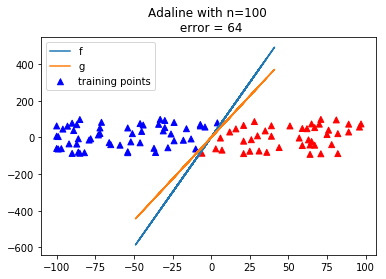

In [79]:
eta = 100
w0 = np.random.random()
weights = [w0] + [0 for i in range(dimension)]

errors = []
train(training_set, errors=errors)

error = error_measure(test_set)
plot_adaline(training_set, error)

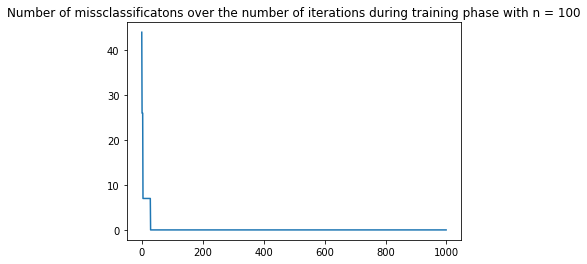

In [80]:
plt.plot(range(len(errors)), errors, label="convergence")
plt.title("Number of missclassificatons over the number of iterations during training phase with n = 100")
plt.show()

## (b) Train and plot the results of the Adaptive Linear Neuron with $\eta$ = 1

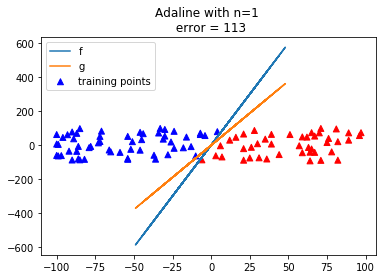

In [81]:
eta = 1
w0 = np.random.random()
weights = [w0] + [0 for i in range(dimension)]
errors = []
train(training_set, errors=errors)

error = error_measure(test_set)
plot_adaline(training_set, error)

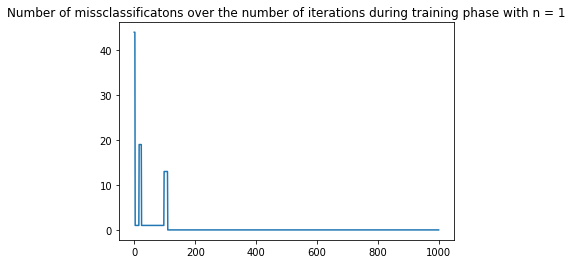

In [82]:
plt.plot(range(len(errors)), errors, label="convergence")
plt.title("Number of missclassificatons over the number of iterations during training phase with n = 1")
plt.show()

## (c) Train and plot the results of the Adaptive Linear Neuron with $\eta$ = 0.01

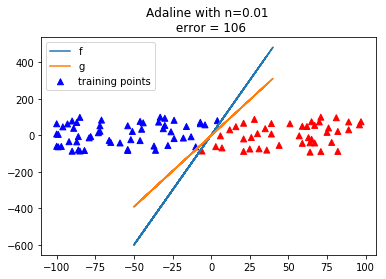

In [73]:
eta = 0.01
w0 = np.random.random()
weights = [w0] + [0 for i in range(dimension)]

errors = []
train(training_set, errors=errors)

error = error_measure(test_set)

plot_adaline(training_set, error)

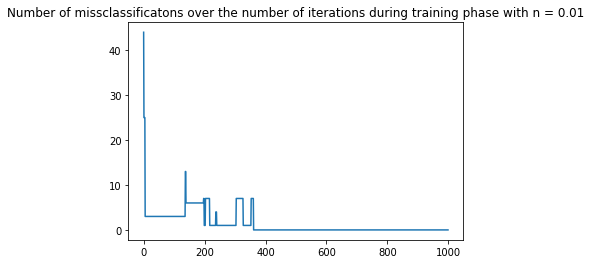

In [74]:
plt.plot(range(len(errors)), errors, label="convergence")
plt.title("Number of missclassificatons over the number of iterations during training phase with n = 0.01")
plt.show()

## (d) Train and plot the results of the Adaptive Linear Neuron with $\eta$ = 0.0001

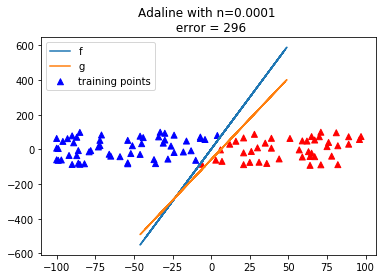

In [71]:
eta = 0.0001
w0 = np.random.random()
weights = [w0] + [0 for i in range(dimension)]

errors = []
train(training_set, errors=errors)

error = error_measure(test_set)
plot_adaline(training_set, error)

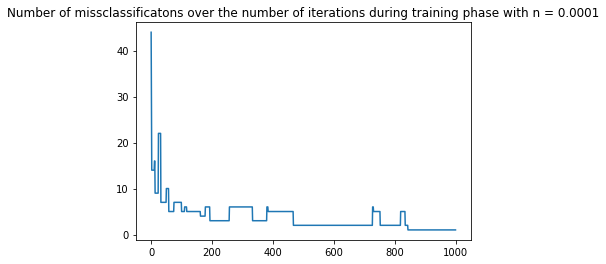

In [72]:
plt.plot(range(len(errors)), errors, label="convergence")
plt.title("Number of missclassificatons over the number of iterations during training phase with n = 0.0001")
plt.show()

### Analysis of results

$\eta$ represent the learning rate of the algorithm. The experiments test if we change the learning rate of the Adaptive Linear Neuron, what type of results can we have. <br>
<p>
In the **(a)** case, the learning rate $\eta$ is very high. Then, we expect that the algorithm will learn really fast. About the final hypothesis $g_a$,  the perceptron after a maximum 1000 of updates returns a good results and as we expect in the graph of the convergence that the algorithm converge very quickly to a low level of error, almost null. <br>
</p>
<p>
In the **(b)** case, the learning rate is decreased and $\eta$ lower than in (a). The final hypothesis $g_b$ is good but less better than (a) but don't have a significant difference between them. In terms of perfomance, the both case remain the same behavior. They learn really quickly and converge almost at the same time. There is no significant difference.  <br>
</p>
<p>
In the **(c)** case, the learing rate $\eta$ is between $0 < \eta < 1$. The final hypothesis $g_c$ remains to be good but weaker than $g_b$ and $g_a$. About the performance, we can see a loss of performance. The algorithm becomes to take much more iterations to converge to a steady-state. After those 3 cases, we can emit an hypothesis that higher the learning rate $\eta$ is, lower the performance will be.<br>
</p>

<p>
    In the **(d)** case, the learning rate $\eta$ becomes very low. The final hypothesis $g_d$ becomes bad. About the performance, we can see that the algorithm didn't really learn within 1000 updates. Therefore the algorithm doesn't finish to learn, the $g_d$ won't be better. As we can compare with the other cases, the final hypothesis $g_d$ is the worst and even in term of performances.
</p>

### Discussion

The parameter $\eta$ determine the learning rate for a Adaptive Linear Neuron **Adaline**. In this expirement, we can see a regression of the quality of the final hypothesis $g$ from the training set and an decreasing of performance. We saw in the results that the higher of $\eta$ is, the quicker the algorithm learn on the training data. <br>
Hence, we can say that the higher value of $\eta$ is, the much quicker the linear Neuron will learn.

## References

<ol>
    <li> INFO-F422 Statistical Foundation of Machine Learning Slides (1-2) - Université Libre de Bruxelles 
    <li> Yaser S. Abu-Mostafa, Malik Magdon-Ismail and Hsuan-Tien Lin - _Learning From Data_ - pages 1-35
    <li> http://www.bogotobogo.com/python/scikit-learn/Single-Layer-Neural-Network-Adaptive-Linear-Neuron.php
    <li> https://en.wikipedia.org/wiki/ADALINE